In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('tested.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#describe dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# checking for null values

<AxesSubplot:>

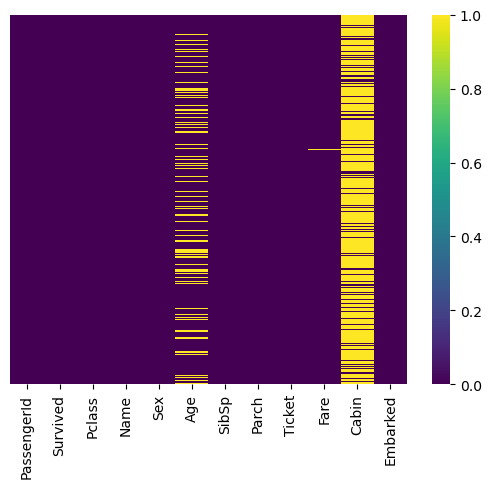

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Observation: In given dataset there are null values are present in column Age,Fare and Cabin so repace it

In [8]:
#checking unique values of columns
df['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [9]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

<AxesSubplot:xlabel='Survived', ylabel='count'>

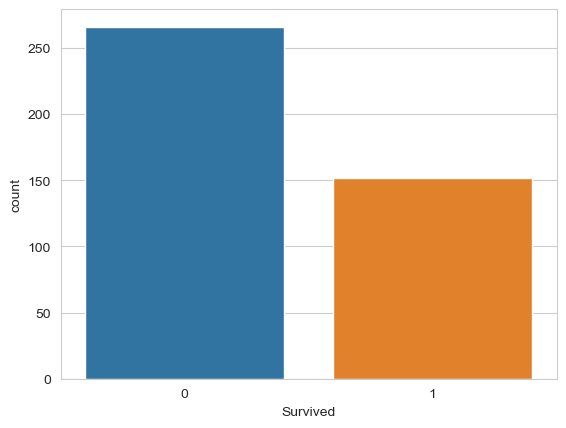

In [10]:
#checking distribution of data
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

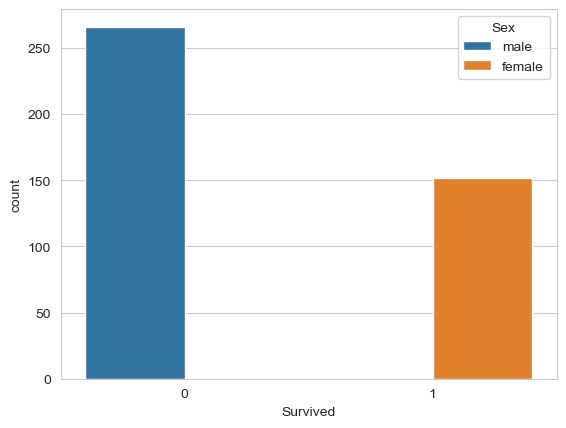

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

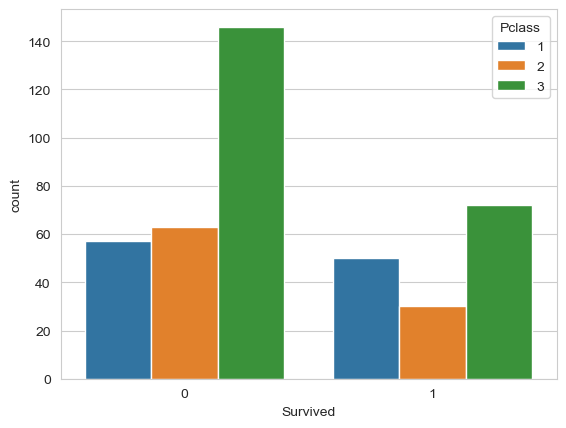

In [12]:
#checking distribution of Survived according to pclass
sns.countplot(x='Survived',hue='Pclass',data=df)

we can see the  passangers in the higher classes tend to be older,which makes sense,we'll use these average age values to impute based on pclass for age

<AxesSubplot:xlabel='Age', ylabel='Density'>

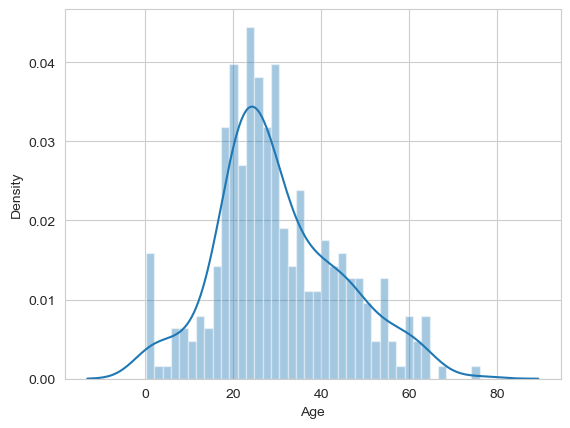

In [13]:
sns.distplot(df['Age'].dropna(),bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

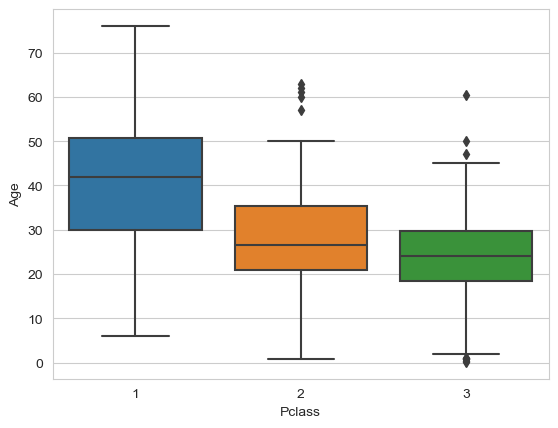

In [14]:
sns.boxplot(x='Pclass',y='Age',data=df)

for age column

replace null values with average values accordig to pclass

1.for class 1:43,

2.for class 2:27,

3.for class 3: 25,

In [15]:
def impute_age(cols):
    Age=cols[0]
    Pclass=[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 43
        elif Pclass==2:
            return 27
        else:
            return 25
    else:
        return Age

In [16]:
#apply function
df['Age']=df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

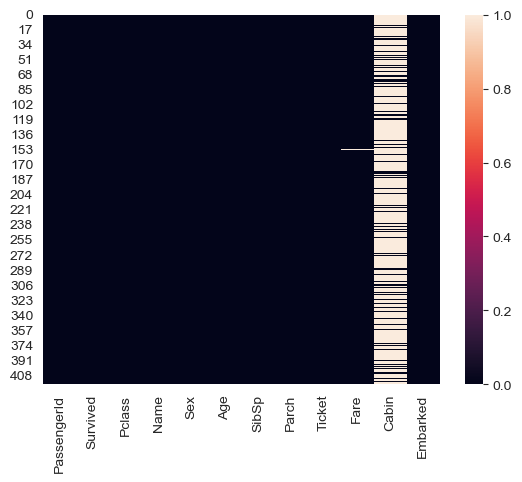

In [17]:
sns.heatmap(df.isnull())

#In the column Cabin there are almost 90% null values are present so the column Cabin is not use for use so drop it

In [18]:
df.drop('Cabin',axis=1,inplace=True)

In [19]:
# for column Fare
#there are only only one null value present so replace with mean
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

<AxesSubplot:>

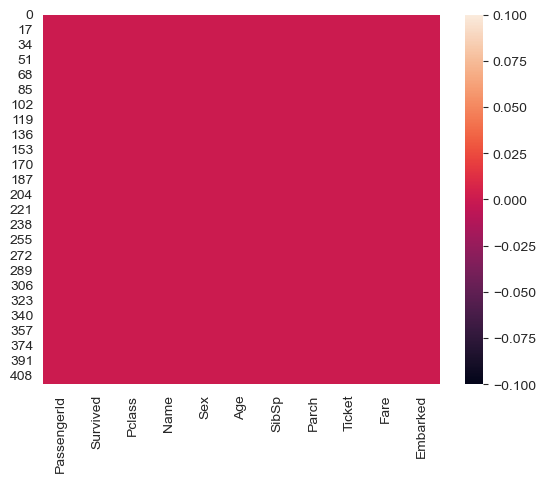

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# checking for outliers

In [22]:
numcol=df.select_dtypes(["int64","float64"]).columns
catcol=df.select_dtypes(["object"]).columns

In [23]:
numcol

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [24]:
catcol

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

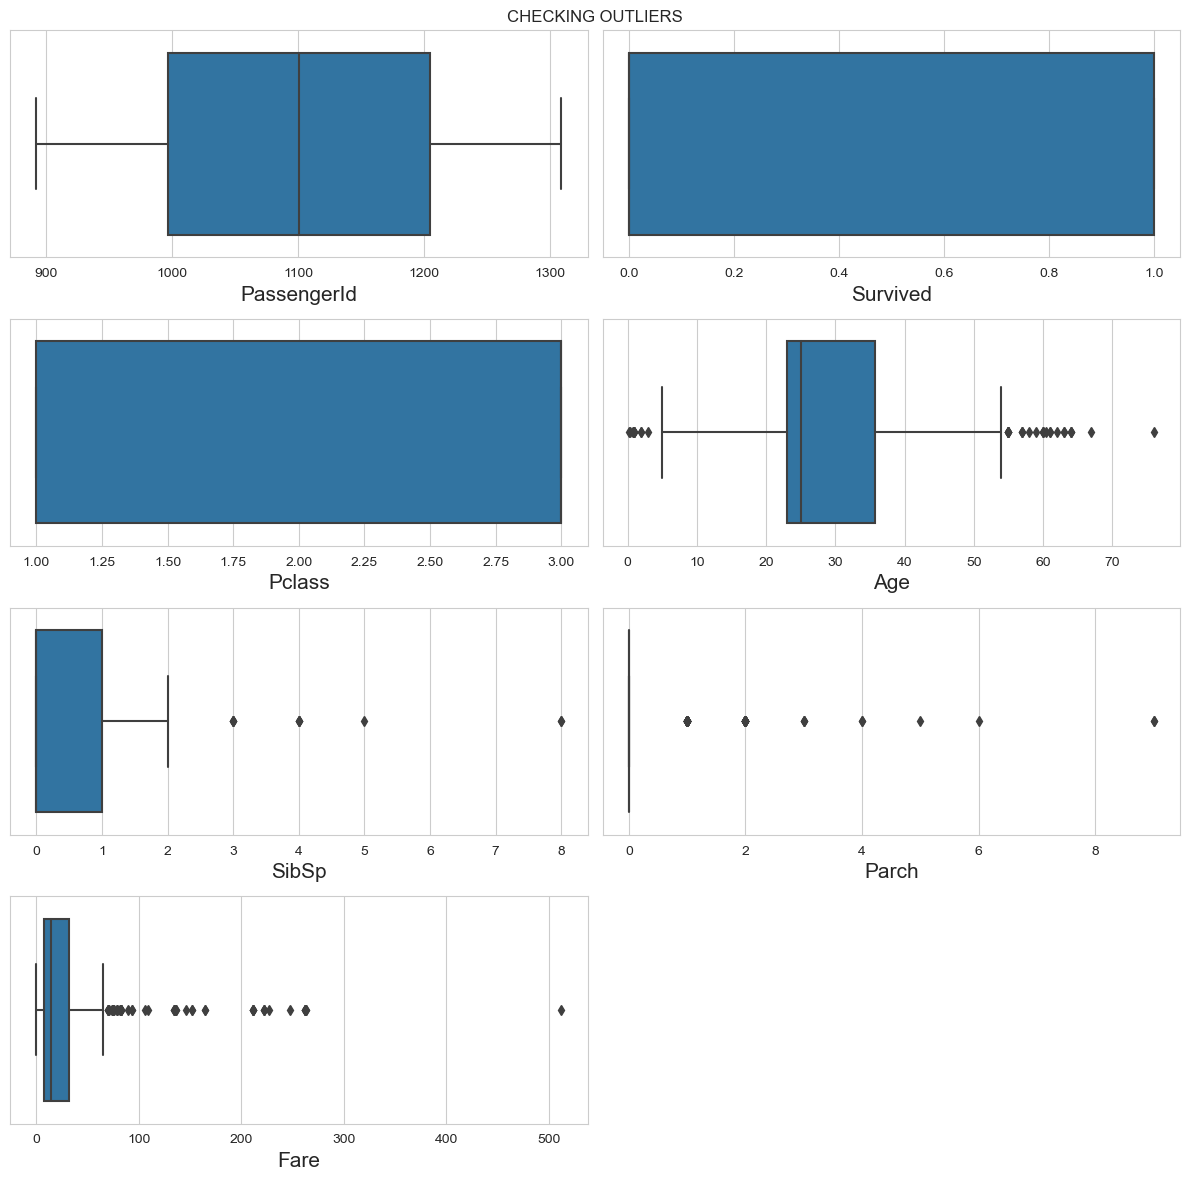

In [25]:
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING OUTLIERS")
pltn=1
for i in numcol:
 if pltn<=8:
  ax=plt.subplot(4,2,pltn)
  sns.boxplot(df[i])
  plt.xlabel(i,fontsize=15)
  pltn=pltn+1
plt.tight_layout()

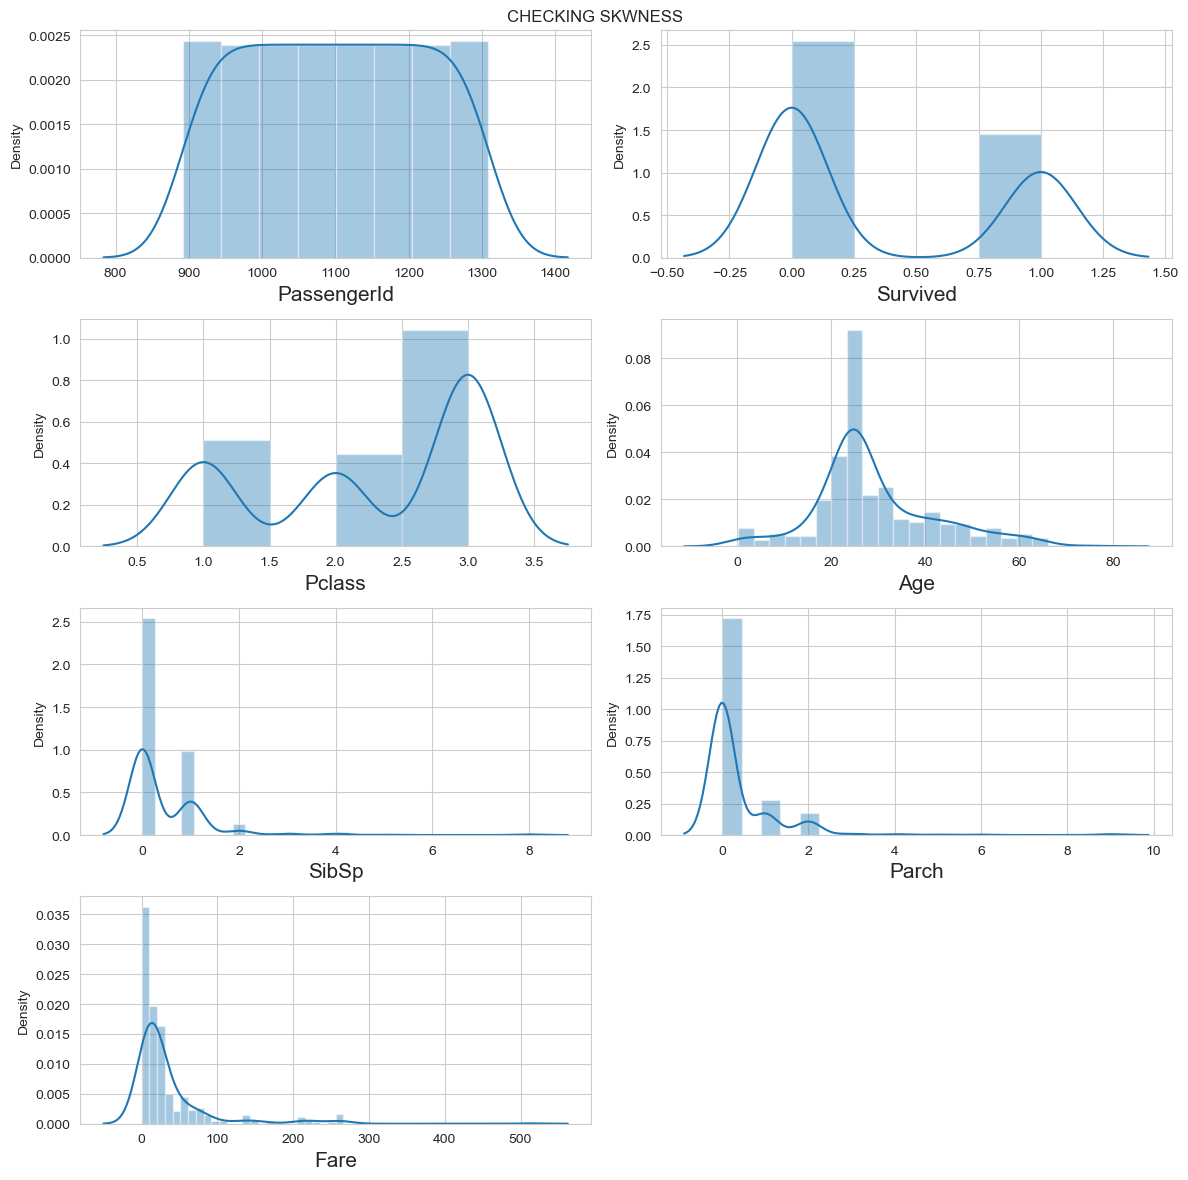

In [26]:
# checking for sckewness
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING SKWNESS")
pltn=1
for i in numcol:
 if pltn<=8:
   ax=plt.subplot(4,2,pltn)
   sns.distplot(df[i])
   plt.xlabel(i,fontsize=15)
   pltn=pltn+1
plt.tight_layout()

In [27]:
#for age
q1,q3=np.percentile(df['Age'],[25,75])
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll


(54.875, 3.875)

In [28]:
def impute_outlier(value):
    if value>ul:
        return a
    elif value<ll:
        return a
    else:
        return value

In [29]:
a=round(df['Age'].mean())
df['Age']=df['Age'].apply(impute_outlier)

<AxesSubplot:xlabel='Age'>

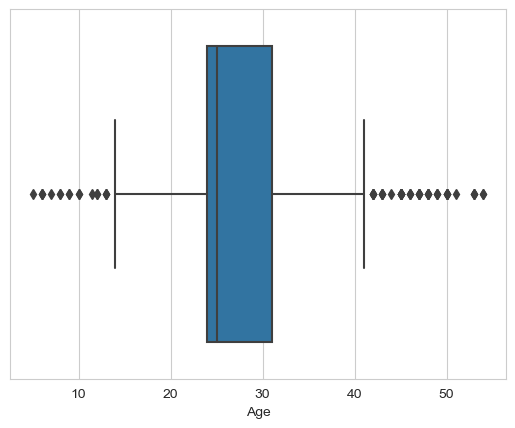

In [30]:
sns.boxplot(df['Age'])

In [31]:
#for SibSp
q1,q3=np.percentile(df['SibSp'],[25,75])
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll


(2.5, -1.5)

In [32]:
df['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [33]:
a=round(df['SibSp'].mode()[0])
df['SibSp']=df['SibSp'].apply(impute_outlier)

<AxesSubplot:xlabel='SibSp'>

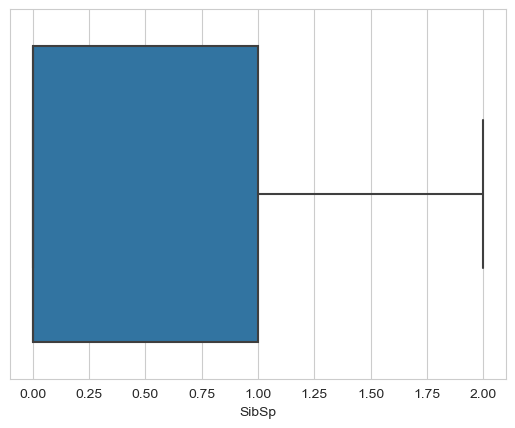

In [34]:
sns.boxplot(df['SibSp'])

In [35]:
#for Fare
q1,q3=np.percentile(df['Fare'],[25,75])
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(66.9063, -27.5105)

In [36]:
df['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
10.5000    11
           ..
8.7125      1
7.8208      1
8.5167      1
78.8500     1
22.3583     1
Name: Fare, Length: 170, dtype: int64

In [37]:
a=(df['Fare'].mean())
df['Fare']=df['Fare'].apply(impute_outlier)


<AxesSubplot:xlabel='Fare'>

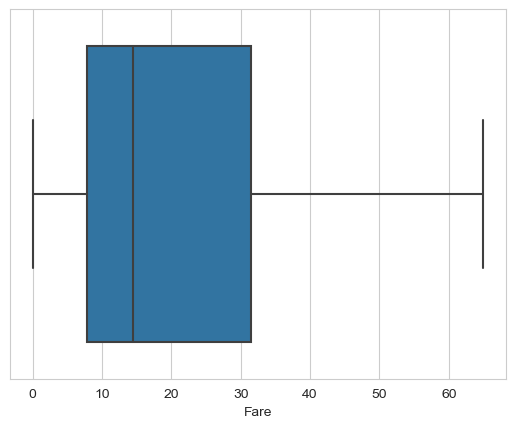

In [38]:
sns.boxplot(df['Fare'])

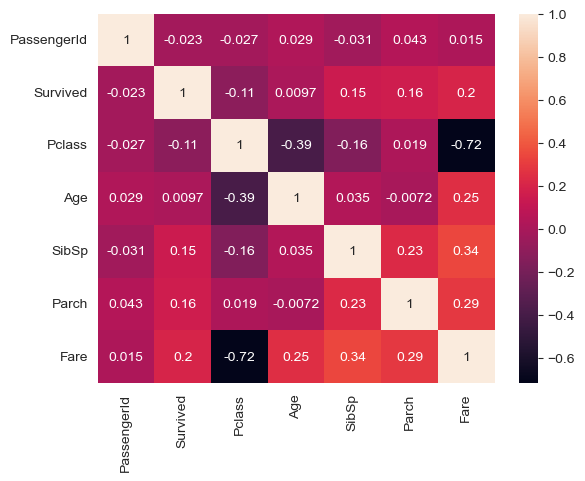

In [39]:
# checking correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

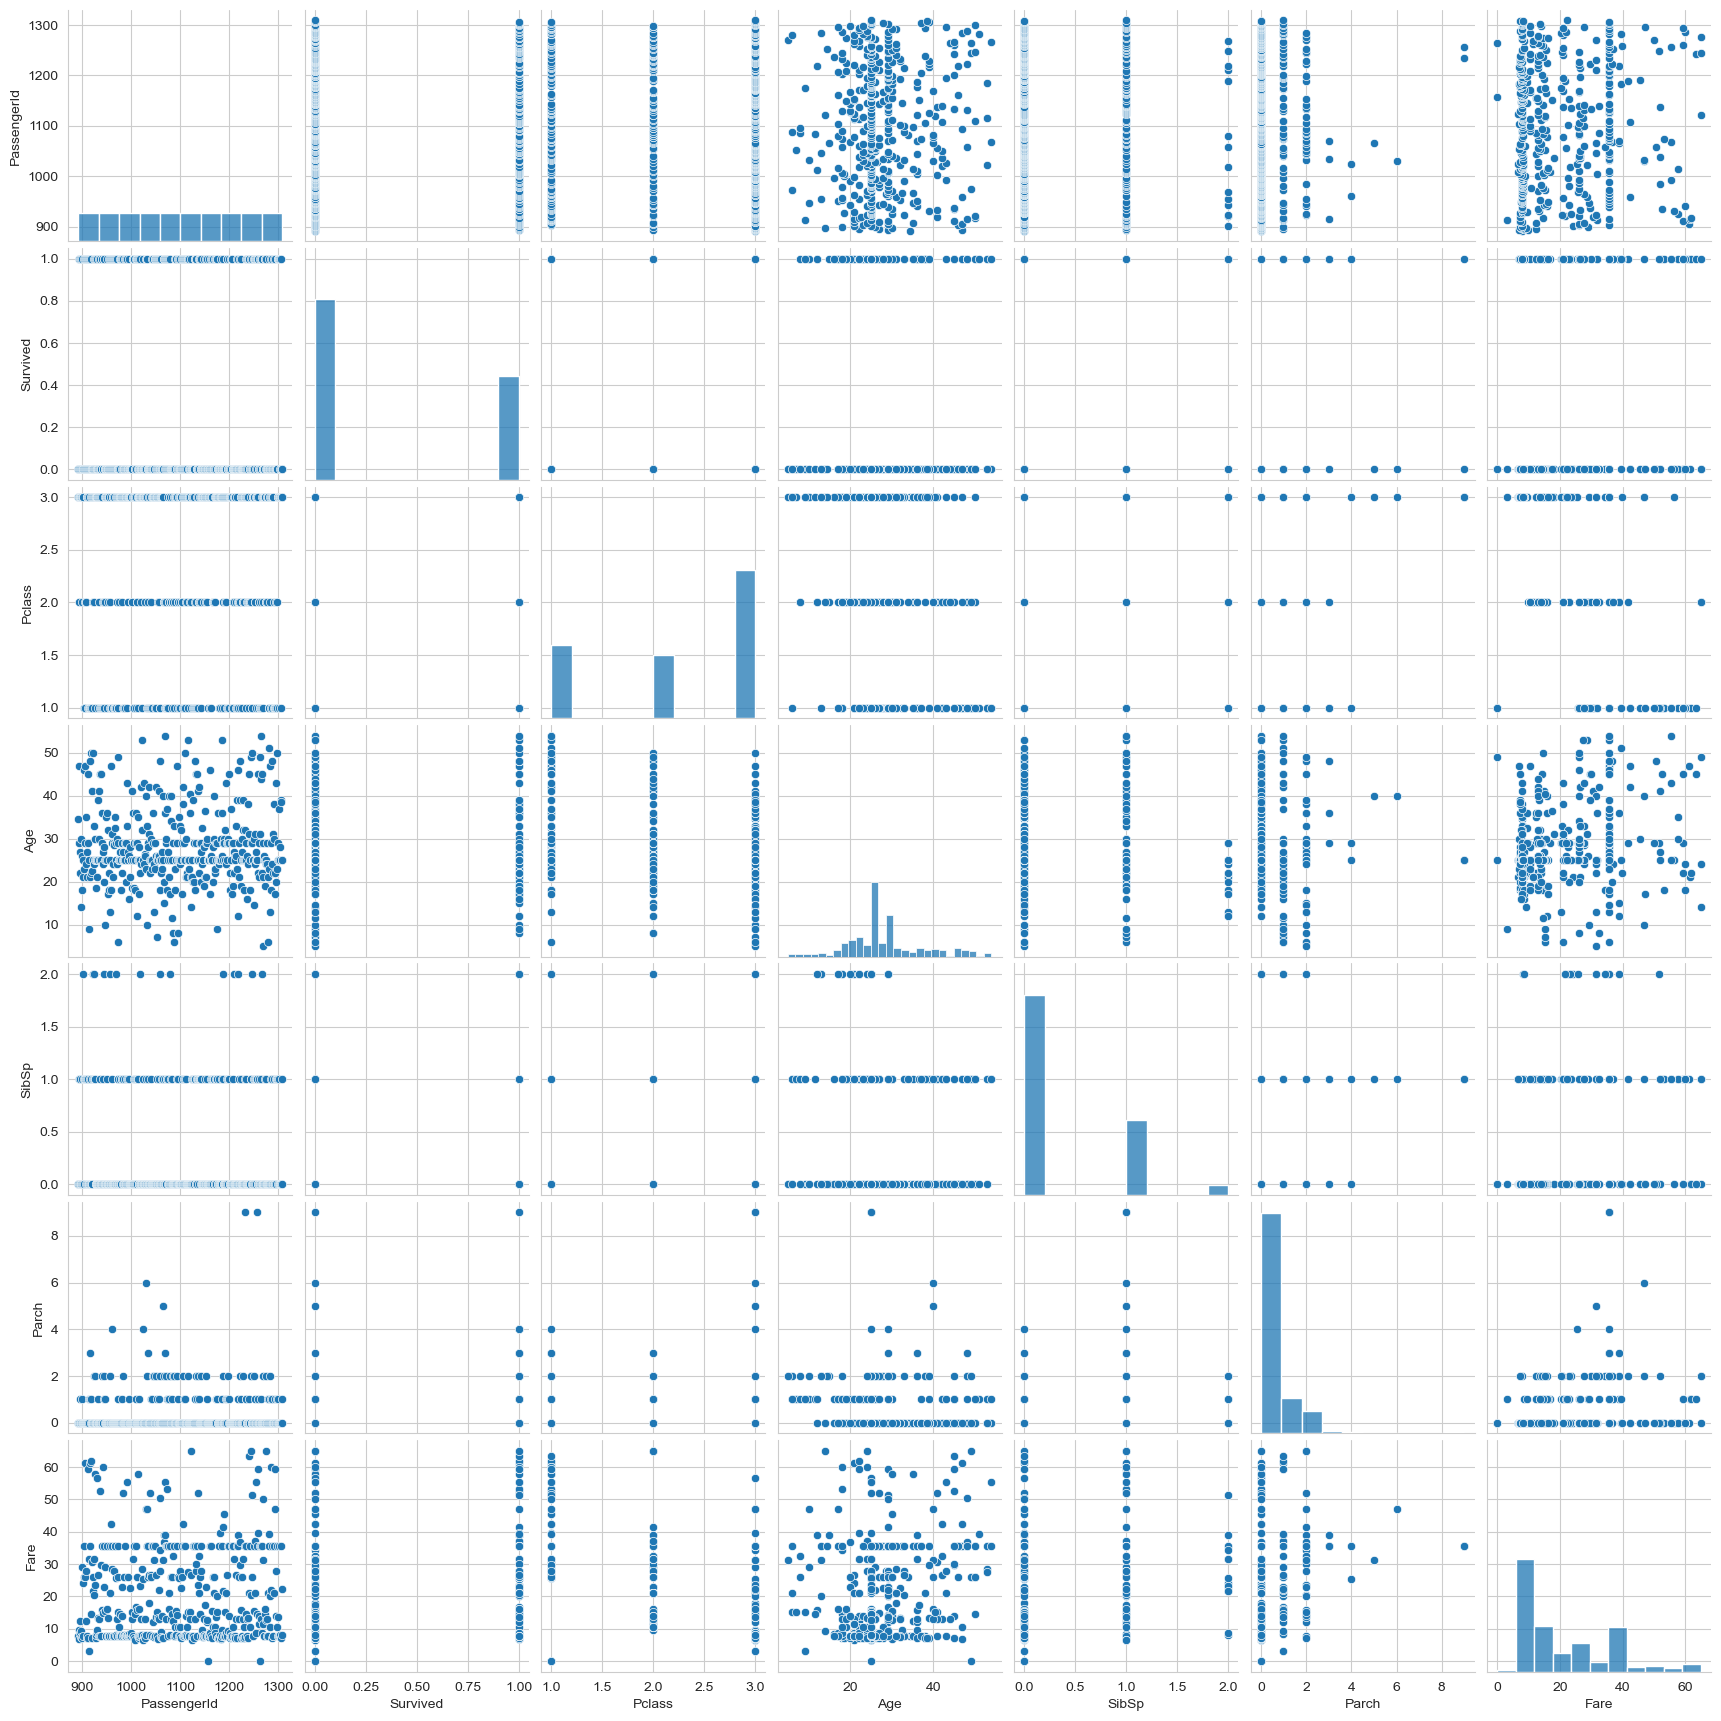

In [40]:
sns.pairplot(df)
plt.show()

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas otherwise our machine learning algorithm wont be able to directtly take those features as input

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [42]:
#for Embarked
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [43]:
#use pandas dummies
embarked=pd.get_dummies(df['Embarked'])
embarked

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [44]:
#for sex
Sex=pd.get_dummies(df['Sex'],drop_first=True)    # here male:1 female:0
Sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [45]:
#concat the dataset
df1=pd.concat([df,Sex,embarked],axis=1)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829200,Q,1,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,S,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,29.0,0,0,240276,9.687500,Q,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662500,S,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.050000,S,1,0,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,35.627188,C,0,1,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,S,1,0,0,1
416,1308,0,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.050000,S,1,0,0,1


In [46]:
#drop unwanted columns
df1.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [47]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,34.5,0,0,7.829200,1,0,1,0
1,1,3,47.0,1,0,7.000000,0,0,0,1
2,0,2,29.0,0,0,9.687500,1,0,1,0
3,0,3,27.0,0,0,8.662500,1,0,0,1
4,1,3,22.0,1,1,12.287500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0,3,25.0,0,0,8.050000,1,0,0,1
414,1,1,39.0,0,0,35.627188,0,1,0,0
415,0,3,38.5,0,0,7.250000,1,0,0,1
416,0,3,25.0,0,0,8.050000,1,0,0,1


In [48]:
# splittig data into dependent and independant data
x=df1.drop(['Survived'],axis=1).values
y=df1['Survived'].values

In [49]:
x

array([[ 3. , 34.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 2. , 29. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 25. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 25. ,  1. , ...,  1. ,  0. ,  0. ]])

In [50]:
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Building a  model

In [51]:
#splitting data into test ad train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [52]:
x_test

array([[ 3., 25.,  0., ...,  1.,  0.,  0.],
       [ 1., 39.,  0., ...,  0.,  0.,  1.],
       [ 3., 21.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 3., 25.,  2., ...,  1.,  0.,  0.],
       [ 3., 33.,  0., ...,  0.,  0.,  1.],
       [ 1., 23.,  0., ...,  0.,  0.,  1.]])

In [53]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
#use logistic refression
from sklearn.linear_model import LogisticRegression

In [55]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred=reg.predict(x_test)

In [57]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix
accu=confusion_matrix(y_test,y_pred)
accu

array([[85,  0],
       [ 0, 41]], dtype=int64)

In [59]:
#checking accuracy of model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [61]:
print('Training Accuracy: %.2f' %reg.score(x_train,y_train))
print('Test Accuracy: %.2f' %reg.score(x_test,y_test))

Training Accuracy: 1.00
Test Accuracy: 1.00


In [62]:
y_pred_proba=reg.predict_proba(x_test)
y_pred_proba # AGAR 0.5 SE ZYAADA AAYA TOH 1 OR ELSE 0

array([[0.97238592, 0.02761408],
       [0.05256173, 0.94743827],
       [0.95605306, 0.04394694],
       [0.97668327, 0.02331673],
       [0.07366266, 0.92633734],
       [0.9698247 , 0.0301753 ],
       [0.08103067, 0.91896933],
       [0.96797776, 0.03202224],
       [0.06601648, 0.93398352],
       [0.97519586, 0.02480414],
       [0.966703  , 0.033297  ],
       [0.05164293, 0.94835707],
       [0.06131966, 0.93868034],
       [0.04690474, 0.95309526],
       [0.97519586, 0.02480414],
       [0.95704583, 0.04295417],
       [0.08070383, 0.91929617],
       [0.95276912, 0.04723088],
       [0.93780717, 0.06219283],
       [0.970275  , 0.029725  ],
       [0.97175375, 0.02824625],
       [0.95308803, 0.04691197],
       [0.06977374, 0.93022626],
       [0.97192222, 0.02807778],
       [0.05979494, 0.94020506],
       [0.04494935, 0.95505065],
       [0.03308676, 0.96691324],
       [0.96283795, 0.03716205],
       [0.97210773, 0.02789227],
       [0.97192222, 0.02807778],
       [0.

In [63]:
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0,